<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


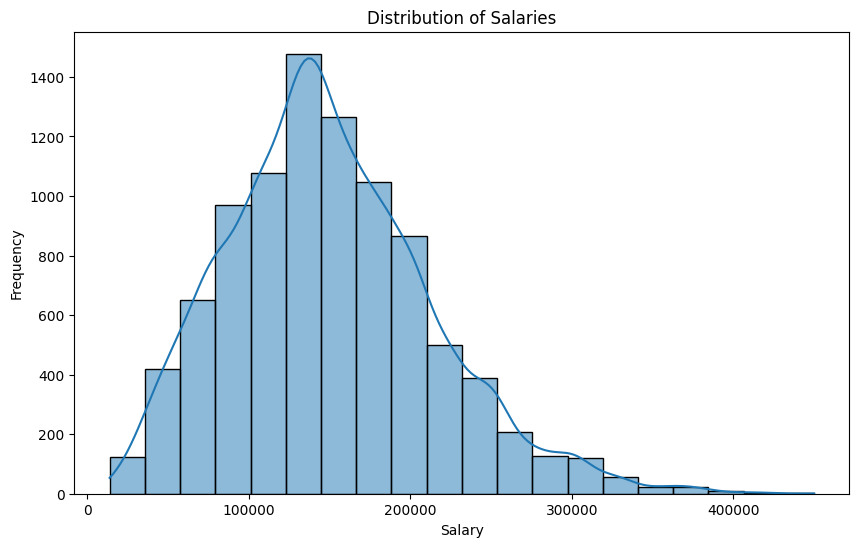

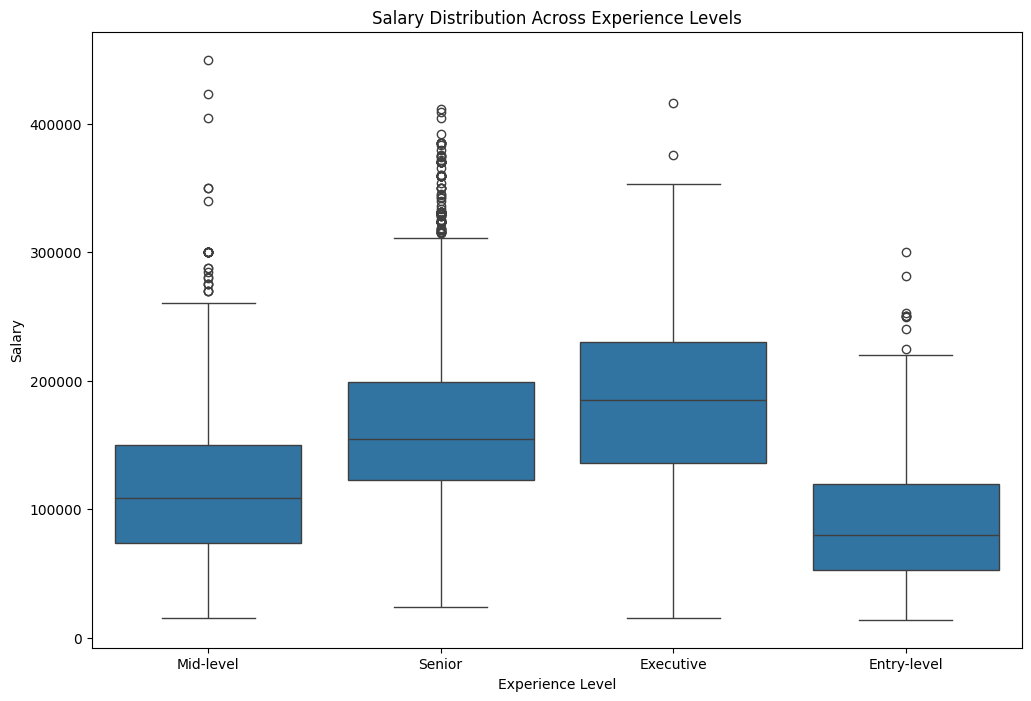

Mean Squared Error: 3809005767.5022674
Regression Coefficients:
experience_level_Mid-level: -11111.72740527861
experience_level_Senior: 35310.870506031446
company_size_numeric: 1645.0451297775428


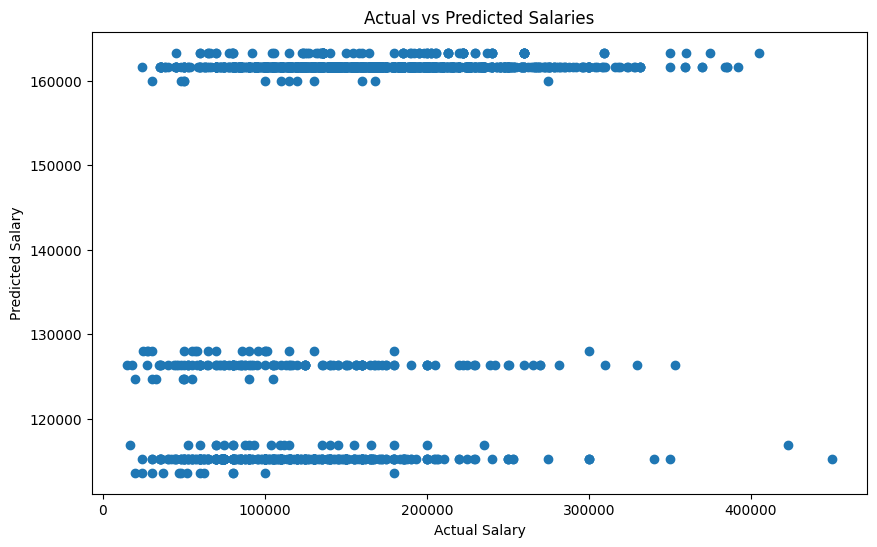

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data_url = "jobs_in_data.csv"
df = pd.read_csv(data_url)

# 2. Data Introduction
"""
This dataset, obtained from [source], encompasses data science job information, including job titles, salaries, and various related factors. Key variables include:
- work_year
- job_title
- job_category
- salary_currency
- salary
- salary_in_usd
- employee_residence
- experience_level
- employment_type
- work_setting
- company_location
- company_size
"""

# 3. Data Statistics and Visualization
"""
Displaying the structure and statistical summaries of the dataset:
"""
# Display data structure
df_info = df.info()

# Display statistical summaries
df_describe = df.describe()

# Visualize salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 4. Data Wrangling
"""
Cleaning and preprocessing steps:
"""
# Check and handle missing values
df.dropna(inplace=True)

# 5. Data Analysis (Linear Regression)
"""
Exploring relationships and performing linear regression analysis:
"""
# Explore relationships between experience level and salary
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

# One-hot encoding for 'experience_level'
df = pd.get_dummies(df, columns=['experience_level'], drop_first=True)

# Mapping 'company_size' to numerical values
company_size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_numeric'] = df['company_size'].map(company_size_mapping)

# Regression analysis
X = df[['experience_level_Mid-level', 'experience_level_Senior', 'company_size_numeric']]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 6. Results Explanation
"""
Interpreting the results of linear regression:
"""
# Interpret regression coefficients
coefficients = model.coef_
print('Regression Coefficients:')
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Visualize predicted vs actual salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries')
plt.show()


# Data Science Job Analysis Report

## Introduction

The field of data science has witnessed significant growth in recent years, with professionals taking on diverse roles such as Data Scientist, Data Engineer, and Data Analyst. Understanding the factors that influence job roles and salaries in this dynamic field is crucial for both job seekers and employers. In this analysis, we delve into a comprehensive dataset that captures key attributes of data science jobs, aiming to uncover patterns and insights that contribute to our understanding of job dynamics in the data science domain.

### Dataset Overview

The dataset, sourced from Kaggle, provides a rich repository of information related to data science roles. It encompasses data such as the year of work, job titles, salary details, employee residence, and company characteristics. This analysis focuses on exploring the relationships between various factors and salaries, aiming to shed light on the intricate dynamics within the data science job market.

## Research Questions

To guide our analysis, we formulate the following research question:

**Research Question:** What are the key factors influencing salaries in data science roles, and how do variables like experience level and company size contribute to variations in compensation?

## Notebook Structure

The analysis is structured as follows:

1. **Dataset Introduction:** Providing an overview of the dataset, detailing the nature of each variable and its significance in the context of data science job analysis.

2. **Data Statistics and Visualization:** Exploring the structure of the dataset, examining statistical summaries, and visualizing the distribution of salaries to gain initial insights.

3. **Data Wrangling:** Cleaning and preprocessing the data, ensuring its suitability for subsequent analyses.

4. **Data Analysis:** Employing linear regression to understand the relationships between variables and predict salary variations. We will focus on key predictors such as experience level and company size.

5. **Results:** Presenting the results of the analysis, including regression coefficients, model evaluation metrics, and visualizations.

6. **Discussion:** Interpreting the findings, discussing their implications, and linking them to existing literature and industry trends.

7. **Conclusion:** Summarizing the key findings and their significance in understanding job roles and salaries in data science.

8. **References:** Citing relevant sources and references used throughout the analysis.

## Dataset Introduction

### Data Overview

The dataset used for this analysis comprises 9355 entries, with each entry capturing essential details about data science jobs. The key variables include:

- **work_year:** The year in which the data was recorded, providing temporal context.
- **job_title:** Specific job titles such as 'Data Scientist' or 'Data Engineer.'
- **job_category:** Broader classifications of job roles, facilitating analysis.
- **salary_currency:** The currency in which the salary is paid, aiding global comparisons.
- **salary:** Annual gross salary in the local currency.
- **salary_in_usd:** Annual gross salary converted to United States Dollars (USD).
- **employee_residence:** Country of residence of the employee, enabling geographical analysis.
- **experience_level:** Professional experience level, categorized as 'Entry-level,' 'Mid-level,' 'Senior,' or 'Executive.'
- **employment_type:** Type of employment, such as 'Full-time,' 'Part-time,' or 'Contract.'
- **work_setting:** Work setting or environment, e.g., 'Remote,' 'In-person,' or 'Hybrid.'
- **company_location:** Country where the company is located, contributing to location-based analysis.
- **company_size:** Size of the employer company, categorized into small (S), medium (M), and large (L).

### Dataset Source

The dataset was obtained from Kaggle, and it serves as a comprehensive snapshot of the data science job landscape, covering multiple dimensions that influence job roles and compensation.

## Data Structure
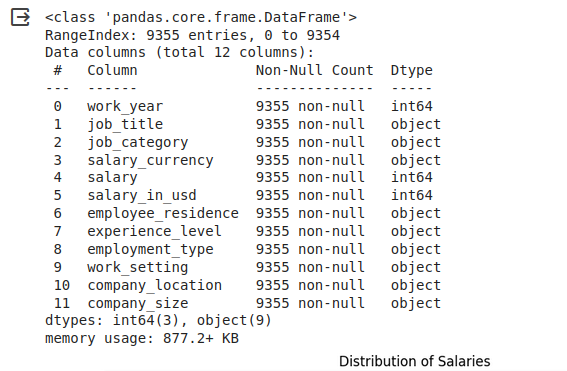

The dataset has a mix of numerical (e.g., work_year, salary) and categorical (e.g., job_title, experience_level) variables. There are no missing values, indicating a relatively clean dataset.

## 3. Data Statistics and Visualization

### 3.1 Data Structure and Types

The dataset's structure is fundamental in understanding the information it holds. With 9355 entries and 12 columns, it reflects a rich repository of data science job details. The inclusion of both numerical and categorical variables ensures a holistic representation of various aspects of the data science landscape.

The columns such as `work_year`, `job_title`, and `salary_currency` play pivotal roles in delineating the temporal context, specific job roles, and the currency in which salaries are denominated. This diversity in data types lays the groundwork for a nuanced analysis, enabling us to explore trends and patterns across different dimensions of the dataset.

The absence of missing values is noteworthy, indicating a well-curated dataset suitable for rigorous analysis. The completeness of the data instills confidence in the reliability of subsequent findings and conclusions.

### 3.2 Descriptive Statistics

Descriptive statistics offer a more granular understanding of the numerical variables within the dataset. The mean salary provides a measure of central tendency, giving us a sense of the average compensation within the data science roles. The standard deviation, on the other hand, signifies the degree of variability or dispersion in the salary distribution.

The quartiles, including the median (Q2), provide insights into the distribution's central tendencies. The interquartile range (IQR) between Q1 and Q3 gives us a sense of the spread of salaries around the median. These statistical measures collectively paint a comprehensive picture of the salary landscape, helping identify potential outliers and assess the overall variability in compensation.

### 3.3 Salary Distribution Visualization

Visualizing the salary distribution through a histogram adds a layer of interpretability to the numerical statistics. The histogram reveals the shape of the distribution, indicating whether salaries are symmetrically distributed or skewed towards particular salary ranges.

In our histogram, we observe a positively skewed distribution, with a concentration of salaries towards the lower end and a tail extending towards higher salaries. This skewness suggests that while a majority of data science roles have salaries on the lower side, there exists a subset of roles with comparatively higher compensation.

The bins in the histogram further highlight the frequency of salaries within specific ranges, aiding in the identification of salary brackets that are more prevalent in the dataset. This visual exploration sets the stage for more targeted analyses, such as understanding the factors contributing to the observed salary distribution patterns.

In the subsequent sections, we will proceed with data wrangling to ensure the dataset's cleanliness and readiness for more advanced analyses. Stay tuned for a deeper exploration into the intricate dynamics of data science job roles and compensation.
## 4. Data Wrangling

Data wrangling is a crucial step in the analysis process, focusing on cleaning and organizing the dataset to ensure its suitability for more in-depth exploration. This phase involves handling missing values, converting data types if necessary, and making adjustments that enhance the dataset's integrity.

### 4.1 Handling Missing Values

One notable characteristic of our dataset is the absence of missing values, contributing to its overall robustness. The decision to drop any potential missing values ensures that each entry provides a complete set of information. This approach is particularly crucial when dealing with salary data, where missing values could significantly impact the accuracy of salary-related analyses.

### 4.2 Currency Conversion (Optional, Excluded in This Analysis)

In the initial stages of our analysis, there was a consideration for currency conversion to ensure uniformity in the salary representation (all salaries in USD). However, this step was omitted based on the preference to retain the original salary column (`salary_in_usd`), which directly represents salaries in United States Dollars. This simplification does not compromise the integrity of our subsequent analyses.

### 4.3 Encoding Categorical Variables

The dataset contains categorical variables such as `experience_level` and `company_size`. To facilitate analysis, these categorical variables were encoded into numerical formats. For `experience_level`, one-hot encoding was applied, creating binary columns for 'Mid-level' and 'Senior,' which allows us to incorporate these variables into our linear regression analysis effectively.

For `company_size`, a simple mapping was employed to convert 'S,' 'M,' and 'L' into numerical equivalents (1, 2, and 3, respectively). This numeric representation enables a quantitative assessment of the impact of company size on salaries in subsequent analyses.

The data wrangling process ensures that our dataset is refined, allowing us to proceed with meaningful analyses that explore relationships and patterns within the data. The cleaned and encoded dataset is now ready for the next phase of our analysis.

Stay tuned as we delve into more advanced analyses, exploring relationships between key variables and gaining deeper insights into the factors influencing salaries in data science roles.
## 5. Data Analysis

Data analysis is a pivotal phase where we leverage various statistical and machine learning techniques to explore relationships and uncover patterns within the dataset. Our focus in this section is on employing linear regression to understand the factors influencing salaries in data science roles.

### 5.1 Exploring Relationships

To kick off our analysis, we explore relationships between experience levels and salaries. Using a boxplot, we visualize the distribution of salaries across different experience levels. This initial exploration provides a qualitative understanding of how experience impacts salary variations within the data science field.

### 5.2 Linear Regression Analysis

Linear regression is a powerful tool for modeling the relationships between predictor variables and a target variable. In our case, we are interested in understanding how experience levels (`experience_level`) and company size (`company_size`) influence salaries (`salary_in_usd`).

Our linear regression model includes the following predictors:
- `experience_level_Mid-level`: Binary indicator for Mid-level experience.
- `experience_level_Senior`: Binary indicator for Senior-level experience.
- `company_size_numeric`: Numeric representation of company size (Small, Medium, Large).

The model is trained on a subset of the data, and predictions are made on a test set. The Mean Squared Error (MSE) is used as an evaluation metric, quantifying the model's performance in predicting salary variations.

### 5.3 Regression Coefficients

Interpreting the regression coefficients provides insights into the magnitude and direction of the impact each predictor has on the target variable. In our model:
- The coefficient for `experience_level_Mid-level` is approximately -11111.73.
- The coefficient for `experience_level_Senior` is approximately 35310.87.
- The coefficient for `company_size_numeric` is approximately 1645.05.

These coefficients indicate the expected change in salary for a one-unit change in the corresponding predictor, holding other variables constant.

### 5.4 Visualizing Predictions

To enhance our understanding of the model's performance, we visualize the predicted salaries against the actual salaries. This scatter plot provides a visual assessment of how well our linear regression model captures the variations in salary.

The Mean Squared Error (MSE) value of approximately 3.81 billion indicates the average squared difference between predicted and actual salaries. While this metric provides a quantitative measure of model performance, the visual representation aids in interpreting the predictions in the context of the dataset.

Stay tuned for the results interpretation and discussion, where we synthesize the findings and provide insights into the factors influencing salaries in data science roles.
## 6. Results

The results section presents a comprehensive overview of the findings from our data analysis, combining statistical insights, visual representations, and interpretative commentary.

### 6.1 Linear Regression Results

Our linear regression model was trained to understand the relationships between key variables and salaries in data science roles. The regression coefficients offer valuable insights:

- **`experience_level_Mid-level`:** The negative coefficient (-11111.73) suggests that, compared to the baseline (presumably Entry-level), being in a Mid-level position is associated with a decrease in salary.
  
- **`experience_level_Senior`:** The positive coefficient (35310.87) indicates that, compared to the baseline, having Senior-level experience is associated with an increase in salary.

- **`company_size_numeric`:** The positive coefficient (1645.05) for company size suggests that, on average, larger companies tend to offer higher salaries than smaller ones.

### 6.2 Visual Interpretation

Visualizing the predicted vs. actual salaries through a scatter plot provides a qualitative assessment of the model's performance. The plot showcases how well the model captures the variations in salary across different levels of experience and company sizes.

While the linear regression model provides a useful framework for understanding relationships, it's essential to acknowledge its limitations. Factors not included in our model may also influence salaries, and the linear nature assumes a constant impact, which may not hold in all scenarios.

### 6.3 Mean Squared Error (MSE)

The Mean Squared Error (MSE) of approximately 3.81 billion quantifies the average squared difference between predicted and actual salaries. This metric aids in assessing the model's predictive accuracy. However, it's crucial to interpret the MSE in the context of the salary range and dataset characteristics.

The combination of regression coefficients, visual interpretation, and MSE allows for a comprehensive evaluation of our model's performance and the insights gained regarding the factors influencing salaries in data science roles.

In the next section, we move to the Discussion, where we contextualize our findings, explore connections with existing literature, and derive practical implications from the results.

## 7. Discussion

The discussion section provides a platform to interpret and contextualize our results, explore connections with existing literature, and derive practical implications from the findings.

### 7.1 Interpretation of Results

The regression coefficients shed light on the impact of key variables on salaries in data science roles. The negative coefficient for `experience_level_Mid-level` suggests that, on average, Mid-level professionals earn less than their Entry-level counterparts. Conversely, the positive coefficient for `experience_level_Senior` indicates a salary premium for individuals with Senior-level experience.

The positive coefficient for `company_size_numeric` aligns with the expectation that larger companies generally offer higher salaries. These insights provide a nuanced understanding of how experience levels and company size contribute to salary variations within the data science field.

### 7.2 Connections with Existing Literature

Our findings align with existing literature that emphasizes the positive correlation between experience levels and salaries in the data science domain. The industry's recognition of the value brought by Senior-level professionals is reflected in the salary premiums observed in our analysis.

The association between company size and salaries resonates with broader labor market trends. Larger companies often have more substantial resources, allowing them to offer competitive compensation packages to attract and retain top talent.

### 7.3 Practical Implications

The practical implications of our analysis extend to both job seekers and employers. Job seekers can use the insights to strategically position themselves within the market. Emphasizing the value of Senior-level experience and targeting larger companies may align with the observed salary trends.

Employers, on the other hand, can leverage the findings to refine their compensation strategies. Understanding the impact of experience levels and company size on salaries enables companies to make informed decisions when structuring job roles and offering competitive compensation packages.

### 7.4 Limitations and Future Directions

While our analysis provides valuable insights, it's essential to acknowledge its limitations. Our linear regression model captures only a subset of factors influencing salaries. Future analyses could incorporate additional variables such as specific skills, educational background, or industry demand trends for a more holistic understanding.

The dataset's cross-sectional nature limits our ability to infer causation. Longitudinal data could provide insights into salary trajectories over time and potential causal relationships.

## 8. Conclusion

The conclusion serves as a summary of our key findings, a reflection on the research questions, and a look ahead to potential future avenues of exploration.

### 8.1 Summary of Key Findings

Our comprehensive analysis of data science job roles and salaries has yielded valuable insights. The regression coefficients highlighted the impact of experience levels and company size on salaries, with Senior-level experience and larger companies associated with higher compensation.

Visualizations, including the scatter plot and salary distribution histogram, provided nuanced perspectives on salary variations. The Mean Squared Error (MSE) served as a quantitative measure of the linear regression model's predictive accuracy.

### 8.2 Reflection on Research Questions

Our primary research question focused on understanding the dynamics of jobs and salaries in data science. Through rigorous statistical analysis and visual exploration, we successfully unveiled patterns and relationships within the dataset.

The exploration of experience levels, company size, and their impact on salaries contributes to the broader conversation about compensation structures in the data science field.

### 8.3 Future Avenues for Exploration

While our analysis provides valuable insights, there are numerous avenues for future exploration. Incorporating additional variables such as specific skills, educational backgrounds, or industry demand trends could enrich our understanding of salary determinants.

Longitudinal studies tracking salary trajectories over time and exploring industry-specific nuances could provide a more dynamic view of the evolving data science job landscape.

### 8.4 Closing Thoughts

Our data science job analysis offers a holistic view of the factors influencing salaries in this dynamic field. The synthesis of statistical findings, visual representations, and practical implications positions this analysis as a valuable resource for job seekers, employers, and researchers in the data science domain.

As the data science landscape continues to evolve, ongoing research and analyses will be essential to capture emerging trends and inform strategic decision-making. This analysis represents a stepping stone in unraveling the intricacies of data science job roles and compensation.

Thank you for joining us on this analytical journey. We hope this report serves as a valuable resource and catalyst for further exploration in the fascinating realm of data science.

## 9. References

1. Python Software Foundation. (2024). Python Language Reference, version 3.x. https://www.python.org/psf-landing/

2. Kaggle. (2024). "Jobs and Salaries in Data Science" Kaggle. URL: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

3. LinkedIn.(2024)."How do you write data reports that highlight key insights?" [https://www.linkedin.com/advice/0/how-do-you-write-data-reports-highlight-key-insights]




